# Random Forests

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"Fraud_check.csv")
print("data Shape:",data.shape)
data.tail()

data Shape: (600, 6)


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
       Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int6

# Analysing the Data

In [5]:
data_M=data.copy()
data_M

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Feature Engineering:

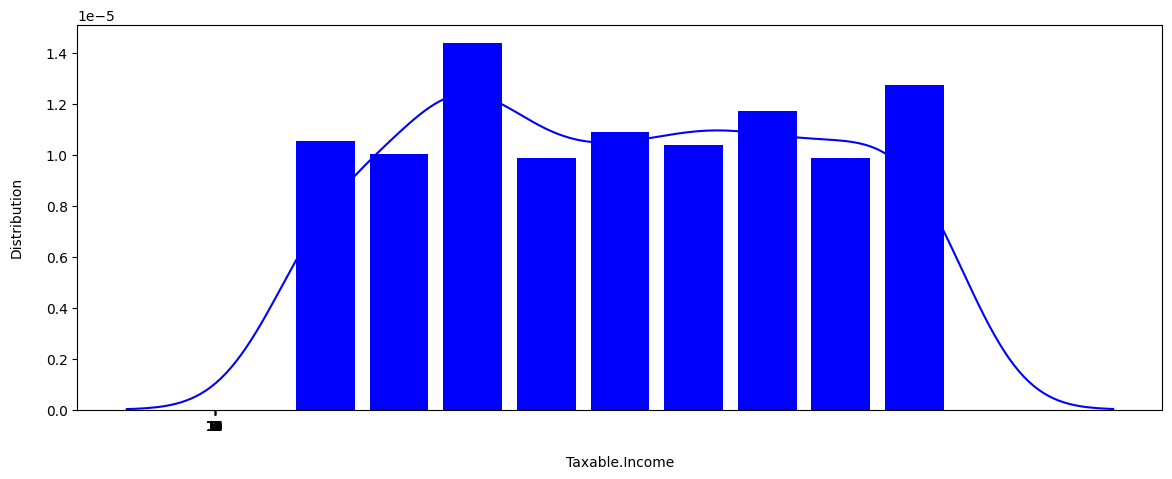

In [6]:
def distplot(param):
    plt.figure(figsize=(14,5))
    sns.distplot(data_M[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1))
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Taxable.Income")

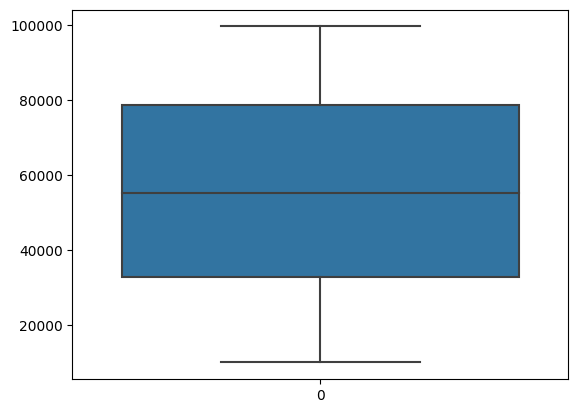

In [7]:
sns.boxplot(data_M["Taxable.Income"])
plt.show()

In [8]:
# feature engineer
def split(num):
    if num <= 30000:
        return "Risky"
    else:
        return "Good"
    
data_M['Taxable.Income'] = data_M['Taxable.Income'].apply(split)
data_M

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


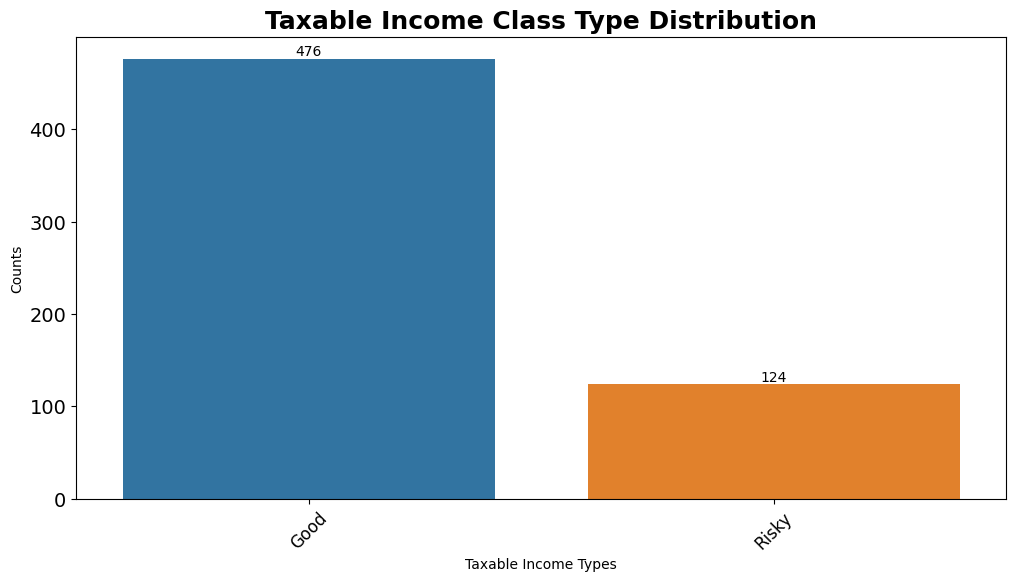

In [9]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = data_M['Taxable.Income'].value_counts().index.tolist(), y = data_M['Taxable.Income'].value_counts().tolist()) 
                # 'ax' -  to add labels to the bars
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Taxable Income Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Taxable Income Types')
plt.ylabel('Counts')
# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i,)

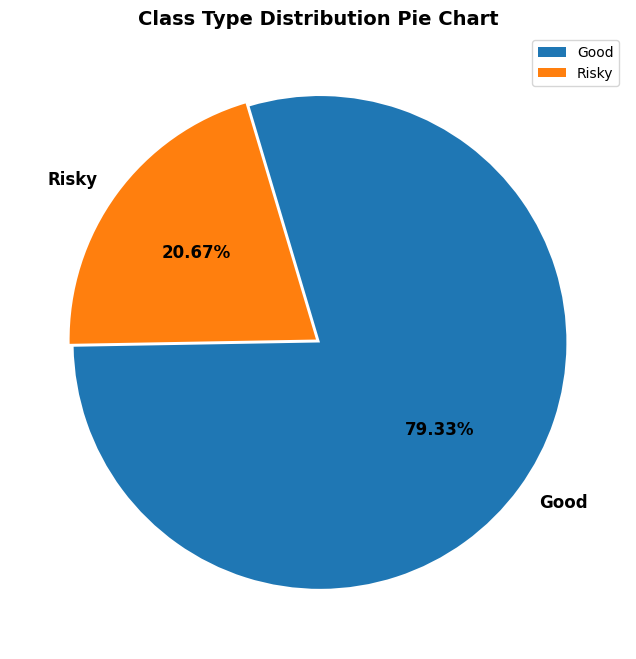

In [10]:
plt.figure(figsize = (9,8))
plt.pie(data_M['Taxable.Income'].value_counts(), labels= data_M['Taxable.Income'].unique(), explode = [0.01,0.01],
       autopct= '%.2f%%', startangle= 181, textprops = {'size':'large','fontweight':'bold','rotation':'horizontal','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 14, fontweight = 'bold')
plt.show()

### Feature scaling

In [11]:
columns_to_encode = data_M.columns[data_M.columns != 'Taxable.Income']
df_num = pd.get_dummies(data_M[columns_to_encode])
df_num['Taxable.Income'] = data_M['Taxable.Income']
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_num['Taxable.Income'] = LE.fit_transform(df_num['Taxable.Income'])
df_num.tail()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable.Income
595,39492,7,False,True,True,False,False,False,True,0
596,55369,2,False,True,True,False,False,False,True,0
597,154058,0,True,False,True,False,False,False,True,0
598,180083,17,False,True,False,True,False,True,False,0
599,158137,16,True,False,True,False,False,True,False,0


# Model Building  & Testing

In [12]:
# x_train = new_data.iloc[:,:-1]    # new_data
# y_train = new_data.iloc[:,-1]
# x_test = new_data.iloc[:,:-1]
# y_test = new_data.iloc[:,-1]

X = df_num.drop(['Taxable.Income'],axis=1)
y = df_num[['Taxable.Income']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)
X_train

Shape of X_train:  (480, 9)
Shape of X_test:  (120, 9)
Shape of y_train:  (480, 1)
Shape of y_test (120, 1)


,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
82,111068,26,True,False,True,False,False,False,True
568,150036,22,True,False,False,False,True,False,True
347,80991,0,True,False,False,True,False,False,True
544,133877,21,True,False,False,False,True,False,True
34,183767,1,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...
129,65469,26,False,True,False,False,True,True,False
144,156503,29,False,True,False,False,True,False,True
72,108300,27,False,True,True,False,False,False,True
235,87541,9,True,False,True,False,False,True,False


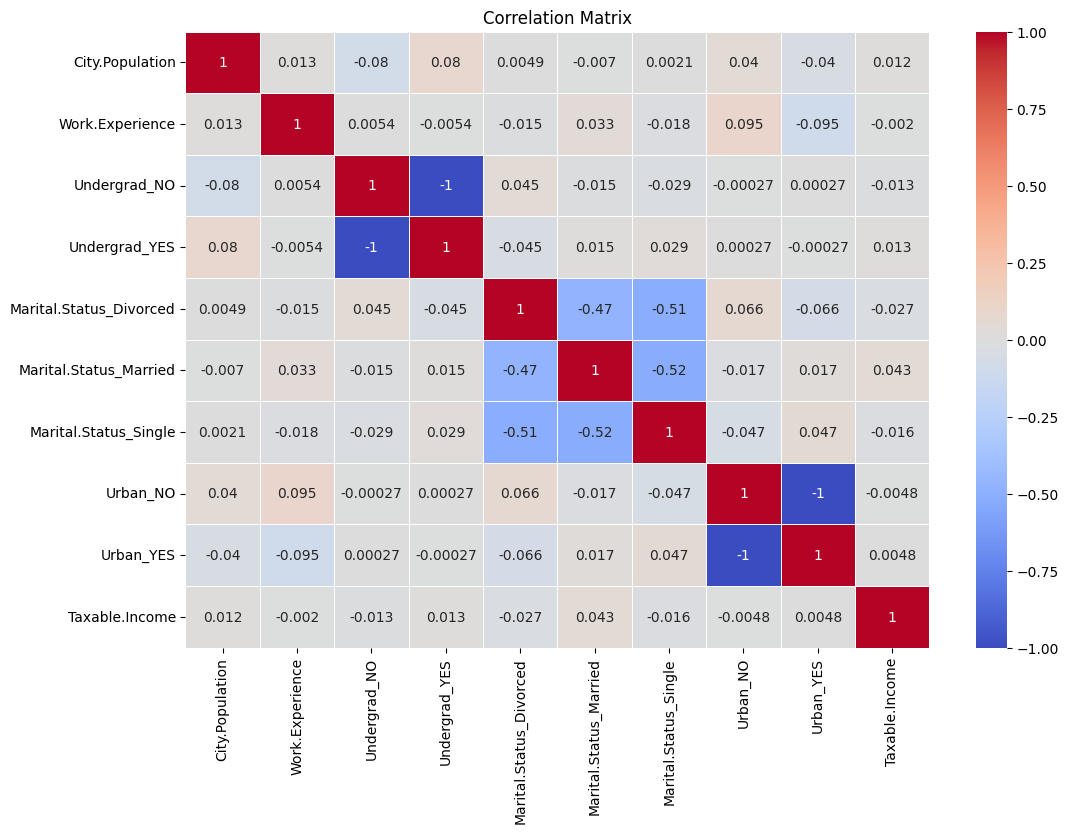

In [13]:
corr_matrix = df_num.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### feature selection with the chi-squared 

In [14]:
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
selected_feature_indices = test.get_support()
selected_feature_names = [X.columns[i] for i, selected in enumerate(selected_feature_indices) if selected]
print("Selected Feature Names:", selected_feature_names)
X_selected = test.transform(X)
X_selected

Selected Feature Names: ['City.Population', 'Marital.Status_Divorced', 'Marital.Status_Married', 'Marital.Status_Single']


array([[ 50047,      0,      0,      1],
       [134075,      1,      0,      0],
       [160205,      0,      1,      0],
       ...,
       [154058,      1,      0,      0],
       [180083,      0,      1,      0],
       [158137,      1,      0,      0]], dtype=int64)

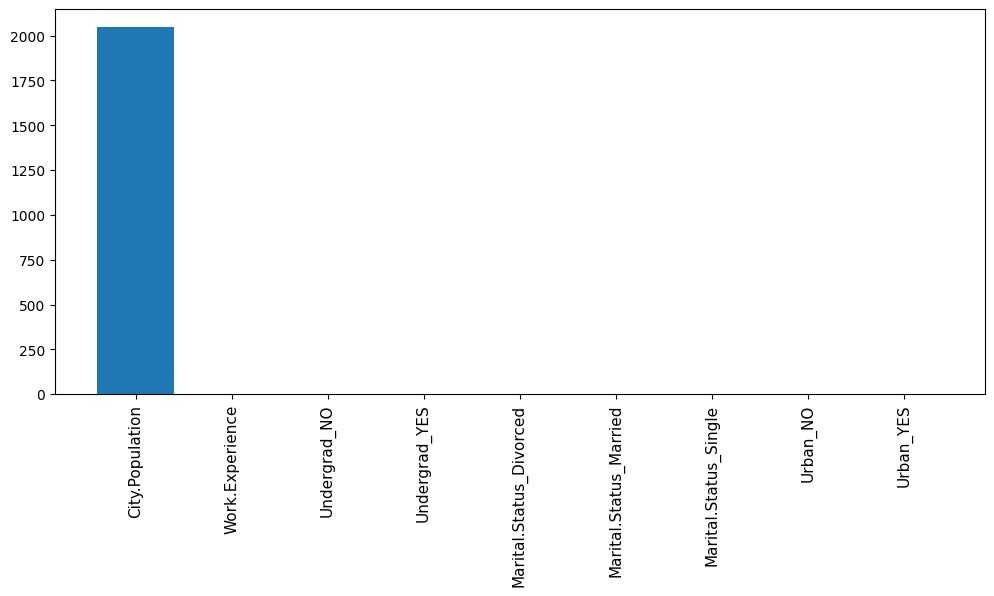

,Feature,Score
0,City.Population,2045.643886
5,Marital.Status_Married,0.756912
4,Marital.Status_Divorced,0.302172
6,Marital.Status_Single,0.095850
2,Undergrad_NO,0.048929
3,Undergrad_YES,0.045165
1,Work.Experience,0.011709
7,Urban_NO,0.007044
8,Urban_YES,0.006951


In [15]:
scores = fit.scores_
fig, axes = plt.subplots(figsize=(12,5))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation= 90, size= 11)
plt.show()

score_data = pd.DataFrame(list(zip(X.columns, scores)), columns =['Feature','Score'])
score_data.sort_values(by="Score", ascending=False, inplace=True)
score_data

### feature selection with Random Forest Built-in Feature

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
rf_classifier.fit(X, y)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200], 'n_estimators': [10,25,30,50,100,200]}

grid_search = GridSearchCV(estimator= rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X, y)
rf_best = grid_search.best_estimator_

print('Checking the oob score :', rf_classifier.oob_score_)
print('Best Score             :', grid_search.best_score_)
print('RF Best Model          :', rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Checking the oob score : 0.7933333333333333
Best Score             : 0.7933333333333333
RF Best Model          : RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)


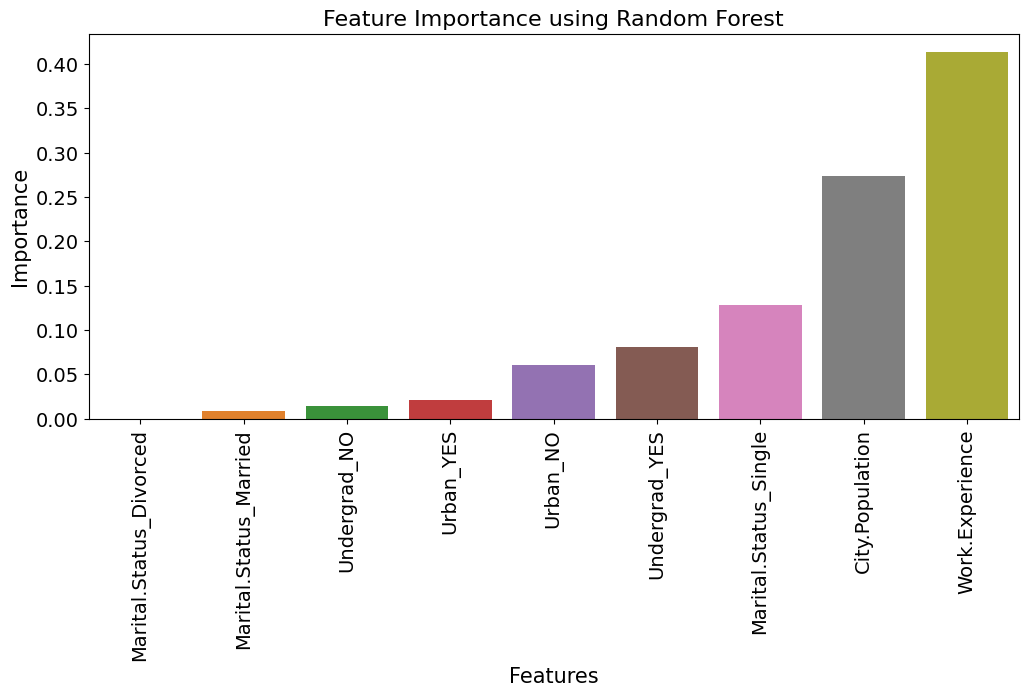

In [17]:
rf_best.feature_importances_
imp_df = pd.DataFrame({"Feature": X.columns, "Importance": rf_best.feature_importances_})

plt.figure(figsize=(12,5))
sns.barplot(x= 'Feature', y= "Importance", data= imp_df, order= imp_df.sort_values('Importance').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Importance using Random Forest", size=16)
plt.show()

## standardization

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.04453457,  1.16220147,  1.03823026, ..., -0.7574764 ,
        -1.0296047 ,  1.0296047 ],
       [ 0.8322421 ,  0.71186306,  1.03823026, ...,  1.32017315,
        -1.0296047 ,  1.0296047 ],
       [-0.56344838, -1.7649982 ,  1.03823026, ..., -0.7574764 ,
        -1.0296047 ,  1.0296047 ],
       ...,
       [-0.01141838,  1.27478607, -0.96317747, ..., -0.7574764 ,
        -1.0296047 ,  1.0296047 ],
       [-0.43104527, -0.75173677,  1.03823026, ..., -0.7574764 ,
         0.97124654, -0.97124654],
       [-0.84804431, -1.20207518,  1.03823026, ..., -0.7574764 ,
        -1.0296047 ,  1.0296047 ]])

# Random Forest classifier

#### Base models

In [19]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
model2 = RandomForestClassifier(criterion='gini', random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
model3 = RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Accuracy & classification report

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
print('model1:')
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

print('\nmodel2:')
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

print('\nmodel3:')
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred3))

model1:
Accuracy: 0.7666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        97
           1       0.00      0.00      0.00        23

    accuracy                           0.77       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.77      0.70       120


model2:
Accuracy: 0.7666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        97
           1       0.00      0.00      0.00        23

    accuracy                           0.77       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.77      0.70       120


model3:
Accuracy: 0.8083333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        97
           1       0.00      0.00      0.00        23



## confusion matrix

model1:


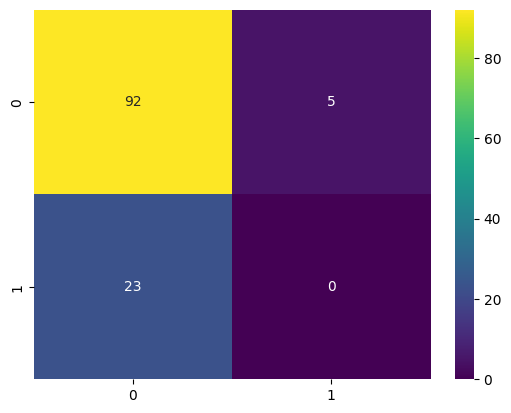


model2:


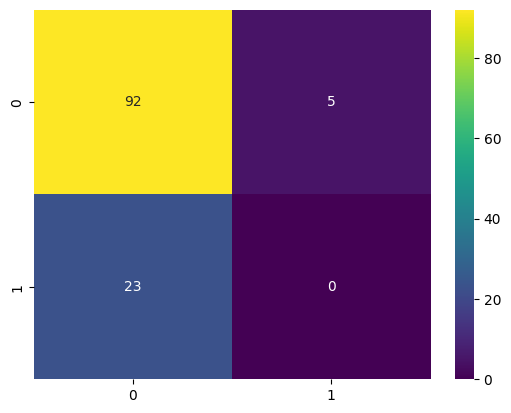


model3:


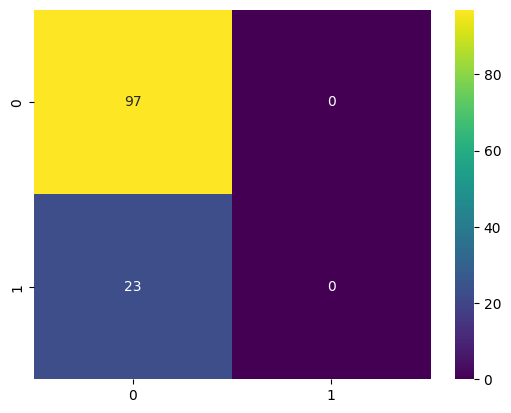

In [23]:
from sklearn.metrics import confusion_matrix
print('model1:')
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

print('\nmodel2:')
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

print('\nmodel3:')
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

## compare the actual with the predicted:

model1:


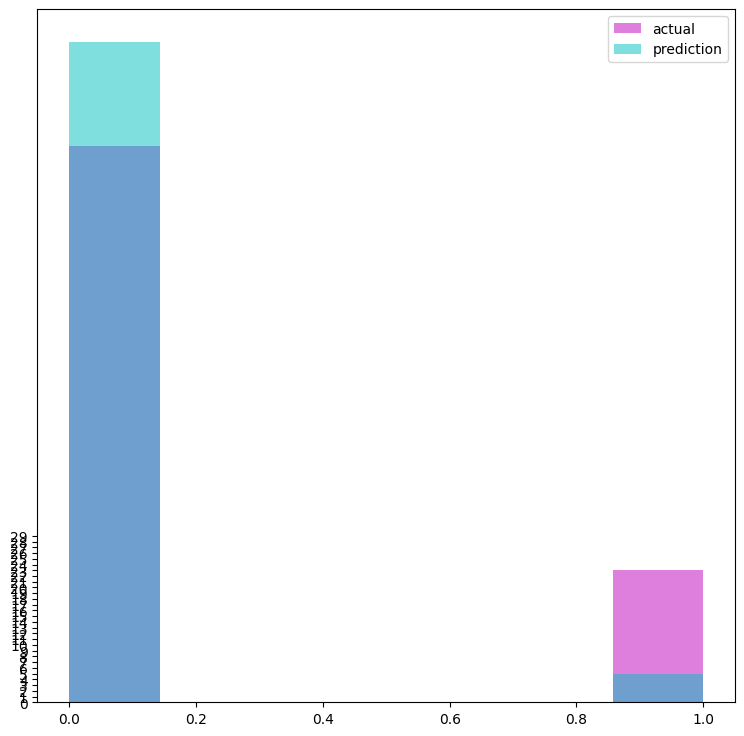

model2:


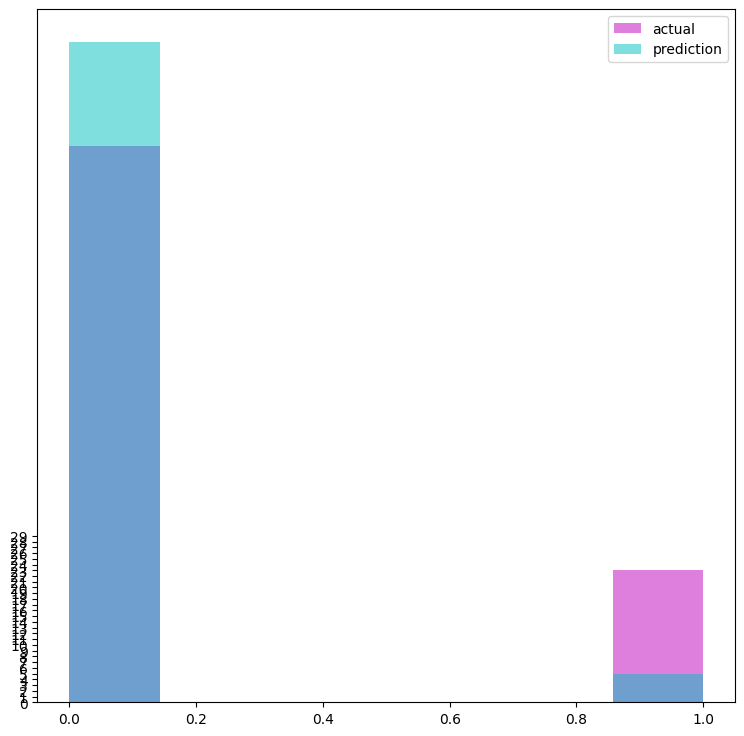

model3:


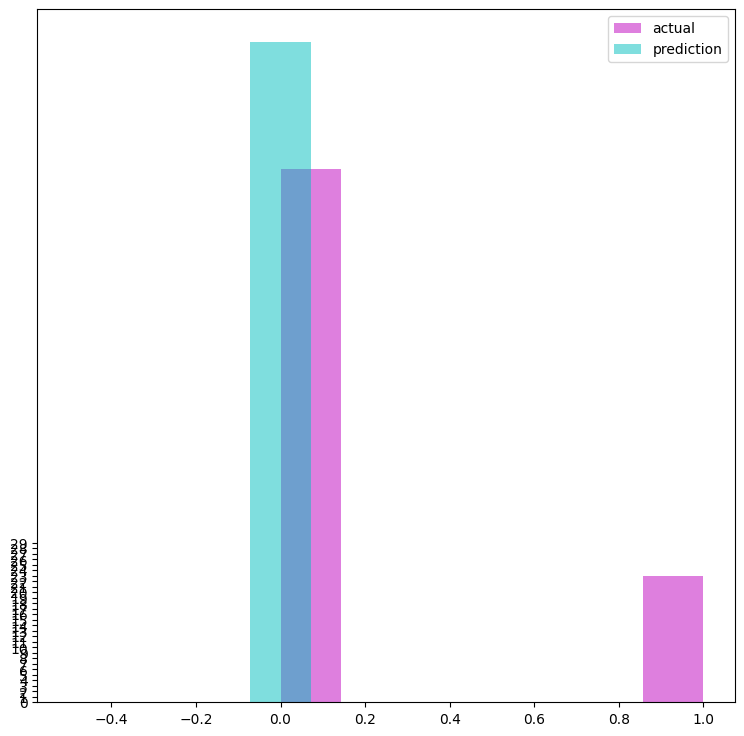

In [24]:
print('model1:')
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred1, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

print('model2:')
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred2, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

print('model3:')
plt.rcParams['figure.figsize'] = (9,9) 
fig, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred3, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

## Precision, Recall, and F1-Score:

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('model1:')
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print('\nmodel2:')
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print('\nmodel3:')
precision = precision_score(y_test, y_pred3, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

model1:
Precision: 0.6466666666666667, Recall: 0.7666666666666667, F1-Score: 0.7015723270440251

model2:
Precision: 0.6466666666666667, Recall: 0.7666666666666667, F1-Score: 0.7015723270440251

model3:
Precision: 0.6534027777777778, Recall: 0.7666666666666667, F1-Score: 0.7015723270440251


## ROC Curve: Multi Classification problem

model1:


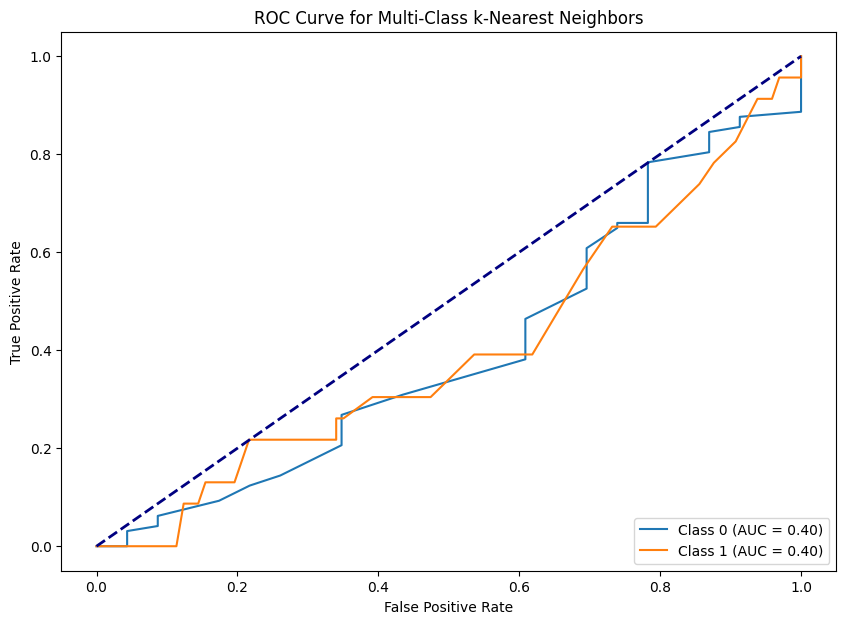


model2:


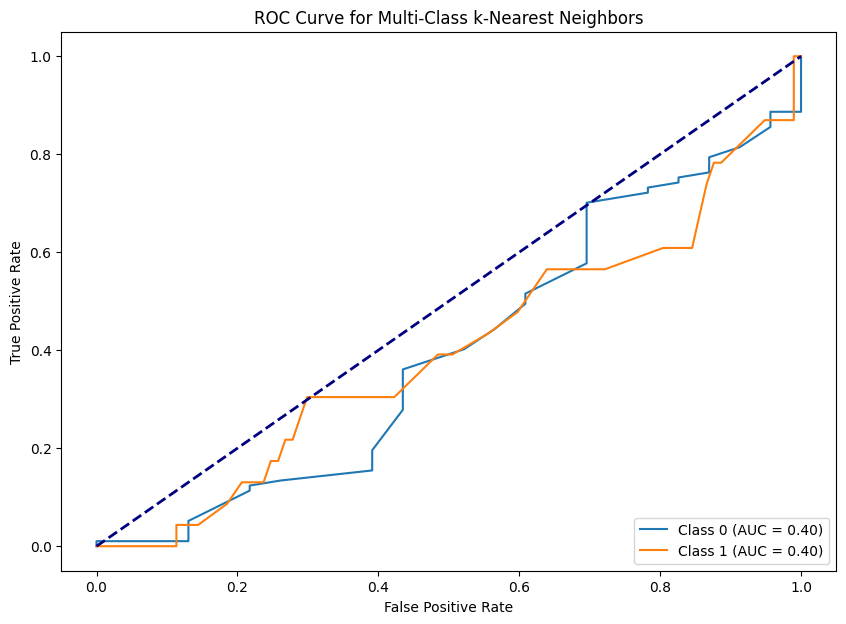


model3:


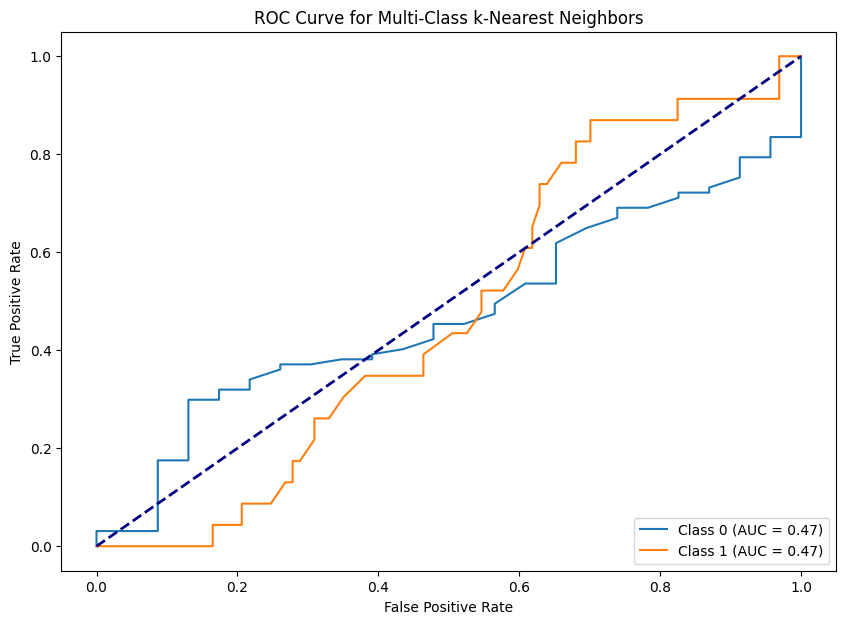

In [26]:
from sklearn.metrics import roc_curve, auc

print('model1:')
y_score = model1.predict_proba(X_test)
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
uniq_out=np.unique(y_train)
num_classes = len(np.unique(y_train))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

print('\nmodel2:')
y_score = model2.predict_proba(X_test)
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

print('\nmodel3:')
y_score = model3.predict_proba(X_test)
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve(y_test == uniq_out[i], y_score[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {uniq_out[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

## Visualizing the decision tree in random forest

In [27]:
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 42) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))

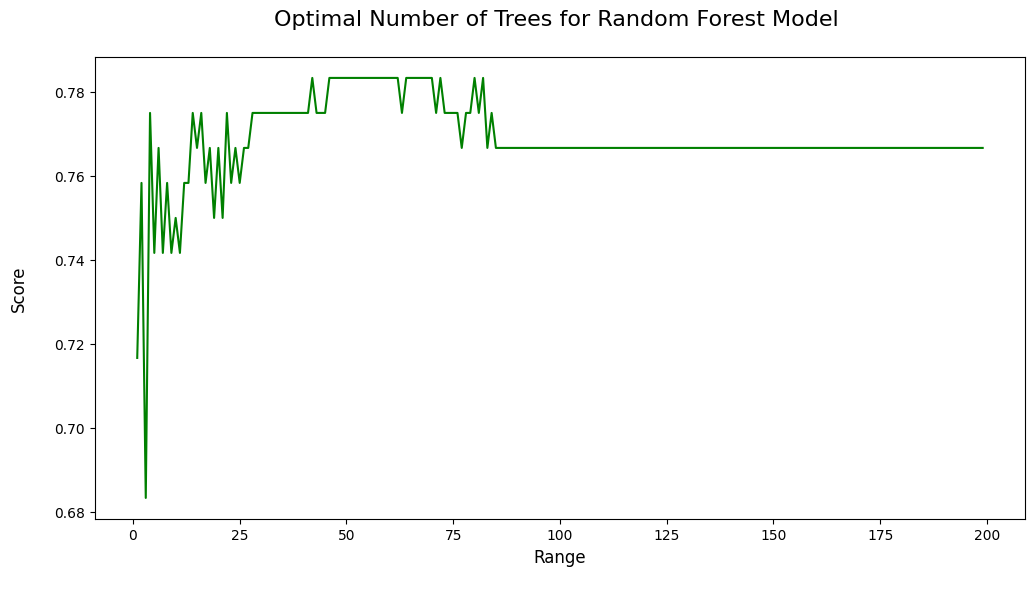

42

In [28]:
fig = plt.figure(figsize=(12,6))
plt.plot(range(1,200),score_array, color = 'g')
plt.ylabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n', horizontalalignment="center", fontsize = 16)
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

loc = np.array(score_array).max()
score_array.index(loc)+1

Decision Tree Visualization:

model1:


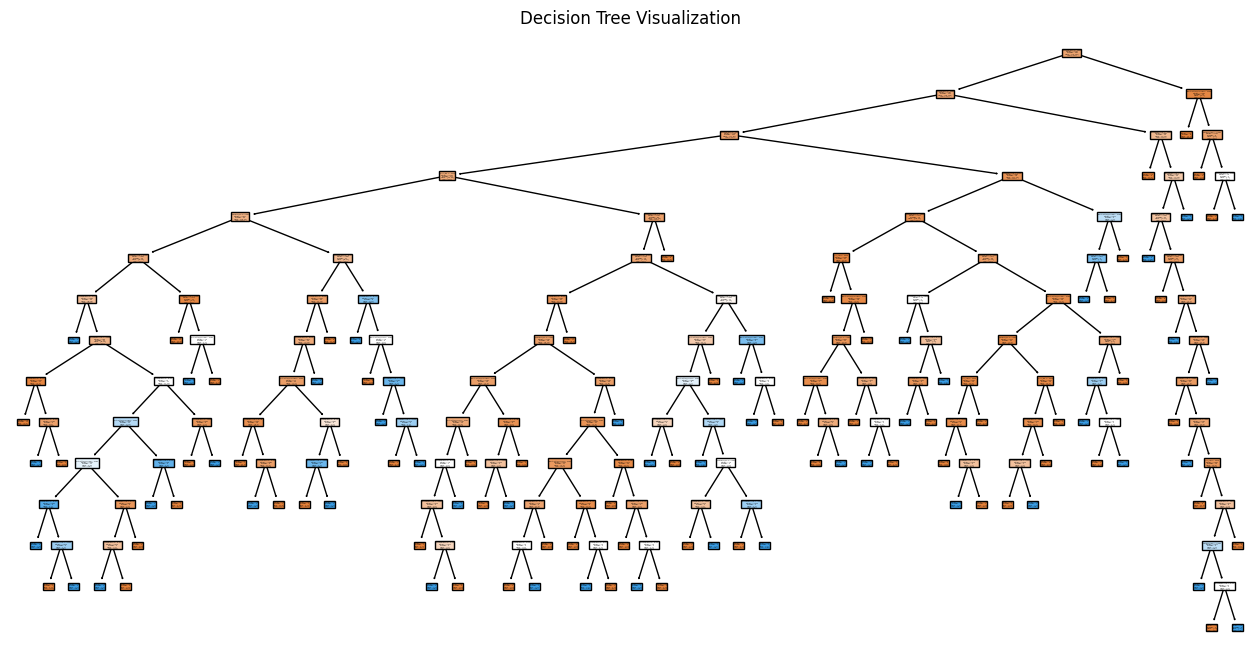


model3:


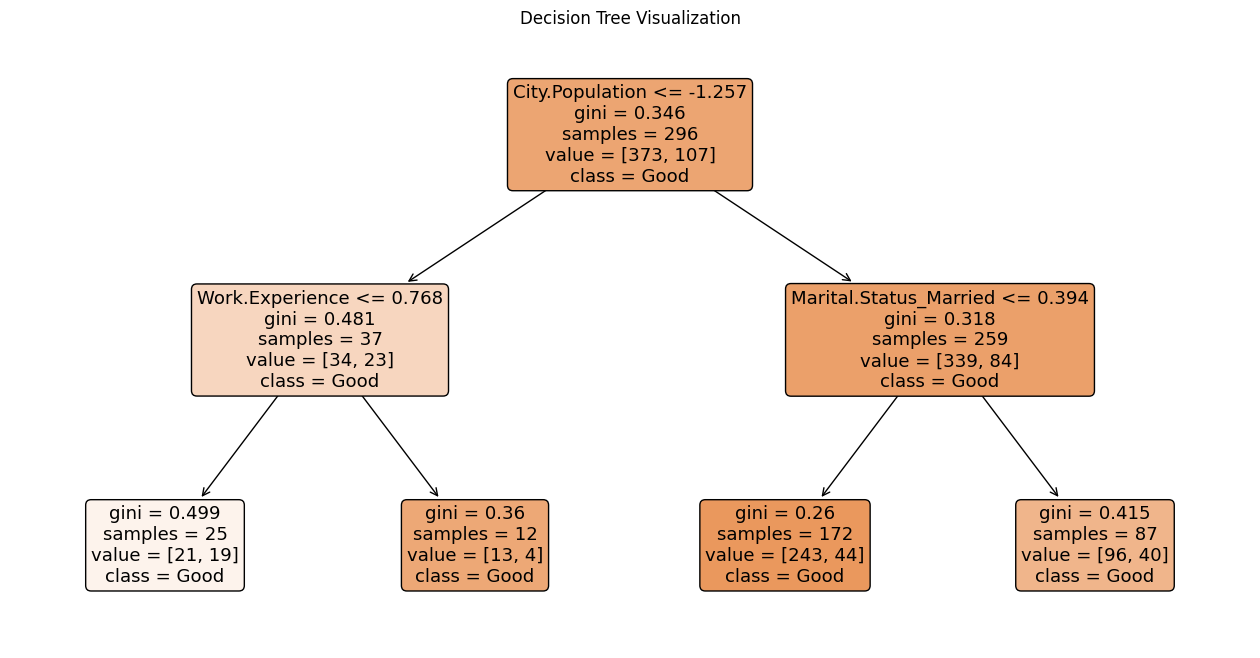

In [29]:
from sklearn.tree import plot_tree

feature_names = X.columns.tolist()
target_names = data_M['Taxable.Income'].unique().astype(str).tolist()
print('model1:')
# Plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(model1.estimators_[99], feature_names=feature_names, class_names=target_names,filled=True)
plt.title("Decision Tree Visualization")
plt.savefig('Decision Tree Visualization_Fraud_check1.png', dpi=600, bbox_inches='tight')
plt.show()

print('\nmodel3:')
# Plot the decision tree 
plt.figure(figsize=(16, 8))
plot_tree(model3.estimators_[9], filled=True, rounded=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree Visualization")
plt.savefig('Decision Tree Visualization_Fraud_check2.png', dpi=600, bbox_inches='tight')
plt.show()

# Final Model Developing

In [30]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [31]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt',5]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV (estimator=rf_clf, scoring='f1',param_distributions=random_grid,
                            n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 5, 'max_depth': 80, 'bootstrap': True})
Train Result:
Accuracy Score: 78.96%
__________________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.829384    0.500000  0.789583    0.664692      0.760076
recall       0.923483    0.287129  0.789583    0.605306      0.789583
f1-score     0.873908    0.364780  0.789583    0.619344      0.766779
support    379.000000  101.000000  0.789583  480.000000    480.000000
__________________________________________________________________________
Confusion Matrix: 
 [[350  29]
 [ 72  29]]

Test Result:
Accuracy Score: 71.67%
__________________________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weig

In [32]:
best_hyperparameters = {
    'n_estimators': 158,
    'min_samples_split': 2,
    'min_samples_leaf': 4,
    'max_features': 'sqrt',
    'max_depth': 110,
    'bootstrap': False
}

# RandomForestClassifier with best hyperparameters
model_Final = RandomForestClassifier(
    n_estimators=best_hyperparameters['n_estimators'],
    min_samples_split=best_hyperparameters['min_samples_split'],
    min_samples_leaf=best_hyperparameters['min_samples_leaf'],
    max_features=best_hyperparameters['max_features'],
    max_depth=best_hyperparameters['max_depth'],
    bootstrap=best_hyperparameters['bootstrap']
)

model_Final.fit(X_train, y_train)
y_pred_Final = model_Final.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_Final)
print(f"Accuracy: {accuracy}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_Final))

Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.88        97
           1       0.00      0.00      0.00        23

    accuracy                           0.79       120
   macro avg       0.40      0.49      0.44       120
weighted avg       0.65      0.79      0.71       120



##  model validation techniques

In [33]:
# model1 = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=42)
X = sc.fit_transform(X)

Cross-Validation:

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_Final, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.79166667 0.78333333 0.775      0.775      0.75      ]
Mean Accuracy: 0.775


Stratified K-Fold Cross-Validation:

In [35]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_Final, X, y, cv=skf)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.78333333 0.76666667 0.75       0.79166667 0.76666667]
Mean Accuracy: 0.7716666666666666


Leave-One-Out Cross-Validation (LOOCV):

In [36]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(model_Final, X, y, cv=loo)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1

Shuffle-Split Cross-Validation:

In [37]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(model_Final, X, y, cv=ss)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.76666667 0.79166667 0.76666667 0.75       0.79166667]
Mean Accuracy: 0.7733333333333333


Time Series Split:

In [38]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(model_Final, X, y, cv=tscv)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.7  0.8  0.75 0.8  0.83]
Mean Accuracy: 0.776
